In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

## Theoretical questions

What is the expression of the AIC and BIC for a dataset $\{X_1,...X_n \}$ modeled with a GMM with $k$ mixtures after EM algorithm.

Since in a GMM with k Mixtures, in each mixture we would have p unknowns for the means of each feature, Then we would have 1 unknowns for the alpha values. Each covariance matrix has p*p unknowns. Therefore,

$AIC=−2⋅Log-Likelihood+2⋅k⋅(p^2+p+1)$

$BIC=−2⋅Log-Likelihood+k⋅(p^2+p+1)⋅ln(n)$



Using the EM algorithm, for GMM with k mixtures, in each of the k mixtures we have:


What is the expression of the AIC and BIC for a dataset $\mathcal{X} =\{(X_1,Y_1),...(X_n,Y_n) \}$ modeled with a Logistic Regression after its training on $\mathcal{X}$. Suppose we have 2 labels and X has p features

$AIC=−2⋅LogLikelihood+2⋅(p+1)$

$BIC=−2⋅LogLikelihood+(p+1)⋅ln(n)$

Explain briefly the concept of K-fold cross validation.

 **ANSWER** The basic idea is to partition the dataset into K subsets, often called "folds," and then train and evaluate the model K times, each time using a different fold as the test set and the remaining folds as the training set. This process allows the model to be tested on different subsets of the data, providing a more robust estimate of its performance.

## Application AIC/BIC

You are going apply the criterias on several datasets.

## Clustering

AIC and BIC can help to estimate the number of clusters when EM algorithm is used (because it's a probabilistic model.)


In [6]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

silly=load_breast_cancer()
wine = load_wine()
X = wine.data
from sklearn.mixture import GaussianMixture

### Task :
- Apply GaussianMixture model using different number of mixture.
- Choose the number of mixtures with the BIC/AIC.

Use the .bic(X) and the .aic(X) method already implemented in sklearn

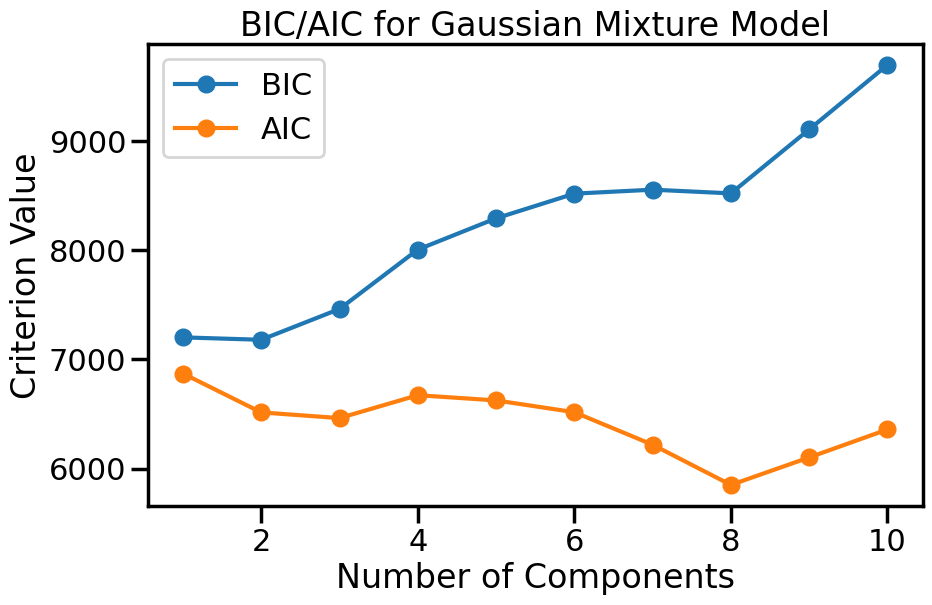

Best number of components (BIC): 2
Best number of components (AIC): 8


In [7]:
# Define the range of components (number of mixtures) to try
n_components_range = range(1, 11)

# Initialize lists to store BIC and AIC values for each number of components
bic_values = []
aic_values = []

# Fit GMM for each number of components and compute BIC/AIC
for number_components in n_components_range:
    gmm = GaussianMixture(n_components=number_components)
    gmm.fit(X)
    bic_values.append(gmm.bic(X))
    aic_values.append(gmm.aic(X))

# Plot BIC and AIC values to choose the best number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_values, label='BIC', marker='o')
plt.plot(n_components_range, aic_values, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.title('BIC/AIC for Gaussian Mixture Model')
plt.legend()
plt.show()

# Choose the number of components with the minimum BIC/AIC value
best_n_components_bic = n_components_range[np.argmin(bic_values)]
best_n_components_aic = n_components_range[np.argmin(aic_values)]

print("Best number of components (BIC):", best_n_components_bic)
print("Best number of components (AIC):", best_n_components_aic)

#We can now continue to fit the model with these best_n_components and it's interesting to see what the results look like
#For eg :gmm = GaussianMixture(n_components=best_n_components_bic)

#BIC penalizes model complexity more heavily than AIC
#→ For finite samples, BIC often chooses models that are too simple,
#because of its heavy penalty on complexity

## Classification

### Tasks :
- Train logistic regression model on the dataset
- Compute AIC for this dataset


In [8]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict log probabilities for  model
log_prob1 = model.predict_log_proba(X_test)

# Calculate log-likelihood for  model
log_likelihood1 = log_prob1[np.arange(len(y_test)), y_test].sum()
print(f"Log-Likelihood for Model: {log_likelihood1}")

# Calculate AIC for  model
k1 = len(model.coef_.ravel()) + 1 # Number of parameters in model, we add 1 for the intercept
print(f"Parameters for Model: {k1}")

aic = 2 * k1 - 2 * log_likelihood1

print("AIC for Logistic Regression:", aic)


Log-Likelihood for Model: -4.702315108847648
Parameters for Model: 40
AIC for Logistic Regression: 89.4046302176953


### Does it seem to be reasonable to add a polynomial kernel as regards AIC or BIC ?

The addition of a polynomial kernel only transforms the dimension space of the problem. AIC and BIC penalize models for their complexity ( having too many unknown parameters ). Ultimately, Adding a polynomial kernel may improve the model fit, allowing it to capture more complex relationships in the data. This could potentially lead to a lower AIC or BIC if the improvement in fit outweighs the increase in complexity.

### What would the AIC be for LDA model assuming we have the same likelihood than the previous logistic regression ?

**ANSWER:** Since the likelihood is the same, we only need to count the number of features. Since in LDA, we share a common covariance matrix, the total number of parameters can be given by : $ k*p + p*p + k $, where $k$ is the number of classes and $p$ is the number of features.

AIC/BIC and cross-validation are mostly used with linear Regression and logisitic regression. AIC/BIC rely on probabilistic caracterics of models in order to compute loglikelihood.

Whereas crossvalidation can be applied in every models and give a more realistic vision of the performance of the model.


## Real Machine Learning situation

Imagine you want to develop and deploy for your job a machine learning algorithm capable of recognizing digits, in order to read automatically bank cheques or bills.
The goal of the development phase for a data scientist is to choose the best performing model and also evaluate the most accurately the generalisation error on unseen data i.e the error the algorithm will produce when it will be operational.
For instance in our case, an error from your algorithm will cost a certain amount of money, it's mandatory to estimate the potential financial loss induced by your model.



In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

X=digits.data
y=digits.target

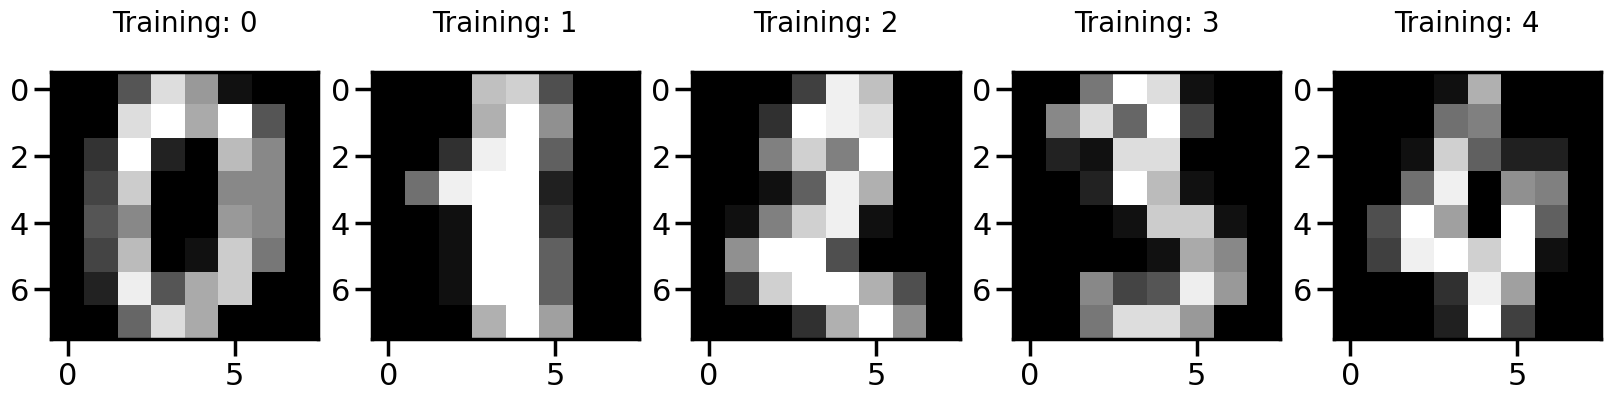

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Choose a model with Cross validation
Cross validation provides a better estimation of the model's performance on the dataset than split train/test method. It's very useful for selecting the most accurate model.


In [29]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.svm import SVC


### Tasks :
- Apply cross validation to Logistic Regression and SVM, choose a C between 0.01 and 1 to add regularization
- Choose the best performing model

In [36]:
wine = load_wine()
X = wine.data
y = wine.target

model_Log = LogisticRegression(solver='liblinear',C=0.01)
cv_results = cross_validate(model_Log, X, y, cv=5, scoring=['accuracy','recall_macro', 'f1_macro'], return_train_score=False)

# Display the cross-validation results
print("LogisticRegression Cross-Validation Results with c = 0.01:")
print("  Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("  Recall (Macro): {:.4f}".format(cv_results['test_recall_macro'].mean()))
print("  F1 Score (Macro): {:.4f}".format(cv_results['test_f1_macro'].mean()))

model_Log = LogisticRegression(solver='liblinear',C=0.5)
cv_results = cross_validate(model_Log, X, y, cv=5, scoring=['accuracy', 'recall_macro', 'f1_macro'], return_train_score=False)

# Display the cross-validation results
print("LogisticRegression Cross-Validation Results with c = 0.5:")
print("  Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("  Recall (Macro): {:.4f}".format(cv_results['test_recall_macro'].mean()))
print("  F1 Score (Macro): {:.4f}".format(cv_results['test_f1_macro'].mean()))

model_Log = LogisticRegression(solver='liblinear',C=0.9)
cv_results = cross_validate(model_Log, X, y, cv=5, scoring=['accuracy', 'recall_macro', 'f1_macro'], return_train_score=False)

# Display the cross-validation results
print("LogisticRegression Cross-Validation Results with c = 0.9:")
print("  Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("  Recall (Macro): {:.4f}".format(cv_results['test_recall_macro'].mean()))
print("  F1 Score (Macro): {:.4f}".format(cv_results['test_f1_macro'].mean()))

model_SVM = SVC(C=0.01)

cv_results = cross_validate(model_SVM, X, y, cv=5, scoring=['accuracy','recall_macro', 'f1_macro'], return_train_score=False)

# Display the cross-validation results
print("SVM Cross-Validation Results with C=0.01:")
print("  Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("  Recall (Macro): {:.4f}".format(cv_results['test_recall_macro'].mean()))
print("  F1 Score (Macro): {:.4f}".format(cv_results['test_f1_macro'].mean()))

model_SVM = SVC(C=0.5)

cv_results = cross_validate(model_SVM, X, y, cv=5, scoring=['accuracy',  'recall_macro', 'f1_macro'], return_train_score=False)

# Display the cross-validation results
print("SVM Cross-Validation Results with C=0.5:")
print("  Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("  Recall (Macro): {:.4f}".format(cv_results['test_recall_macro'].mean()))
print("  F1 Score (Macro): {:.4f}".format(cv_results['test_f1_macro'].mean()))

model_SVM = SVC(C=0.9)

cv_results = cross_validate(model_SVM, X, y, cv=5, scoring=['accuracy', 'recall_macro', 'f1_macro'], return_train_score=False)

# Display the cross-validation results
print("SVM Cross-Validation Results with C=0.9:")
print("  Accuracy: {:.4f}".format(cv_results['test_accuracy'].mean()))
print("  Recall (Macro): {:.4f}".format(cv_results['test_recall_macro'].mean()))
print("  F1 Score (Macro): {:.4f}".format(cv_results['test_f1_macro'].mean()))


print("CLEARLY, Logistic Regression Works Better")

LogisticRegression Cross-Validation Results with c = 0.01:
  Accuracy: 0.8829
  Recall (Macro): 0.8724
  F1 Score (Macro): 0.8755
LogisticRegression Cross-Validation Results with c = 0.5:
  Accuracy: 0.9611
  Recall (Macro): 0.9624
  F1 Score (Macro): 0.9621
LogisticRegression Cross-Validation Results with c = 0.9:
  Accuracy: 0.9611
  Recall (Macro): 0.9624
  F1 Score (Macro): 0.9621
SVM Cross-Validation Results with C=0.01:
  Accuracy: 0.3990
  Recall (Macro): 0.3333
  F1 Score (Macro): 0.1901
SVM Cross-Validation Results with C=0.5:
  Accuracy: 0.6633
  Recall (Macro): 0.6070
  F1 Score (Macro): 0.5466
SVM Cross-Validation Results with C=0.9:
  Accuracy: 0.6633
  Recall (Macro): 0.6241
  F1 Score (Macro): 0.5925
CLEARLY, Logistic Regression Works Better


### Estimation of the generalization error

As we have choosen our model, we have to evaluate its future performance on unseen data. The most easy way is to use the split train/test method to have a confidence interval based on the performance of the model on the test dataset.

One could want to use cross validation for doing this estimation, however the several estimations returned by k fold cross-val don't garentee the independance of the estimations. The independence is needed for confidence intervals. This is why randomized split train/test is used.

### Tasks :
- Split the dataset 50%/50% and fix the random state of the split_train_test
- Return the test accuracy with the choosen model

In [49]:
from sklearn.metrics import accuracy_score

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=49)

model_Log = LogisticRegression(solver='liblinear', C=0.5)
model_Log.fit(X_train, y_train)


y_pred = model_Log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.9325842696629213



### Confidence intervals
Assume that the event to have a right classification with our model follows a bernouilli process with paramater p.
The accuracy on the test dataset ($\hat{p}$) gives us an estimation of p.



### Task : Make a 99% confidence interval of the real accuracy using Central limit theorem

In [52]:
# Number of samples in the test dataset
n = len(y_test)

# Desired confidence level (99%)
confidence_level = 0.99

# Calculate the standard error
standard_error = np.sqrt((accuracy * (1 - accuracy)) / n)

# Calculate the Z-score based on the confidence level
z_score = 2.576  # For a 99% confidence interval

# Calculate the margin of error
margin_of_error = z_score * standard_error

# Calculate the confidence interval
confidence_interval_lower = accuracy - margin_of_error
confidence_interval_upper = accuracy + margin_of_error

# Print the results
print("Observed Accuracy:",accuracy)
print("Confidence Interval:",confidence_interval_lower, confidence_interval_upper)

Observed Accuracy: 0.9325842696629213
Confidence Interval: 0.8641181806941882 1.0010503586316544


### Hoeffding inequality

A non negligeable inequality for constituting confidence interval for large dataset is Hoeffding inequality which is often tighter than CLT inequality for very large dataset (our dataset is maybe not large enough)

Hoeffding’s inequality: Suppose that $\{Z_1, . . . , Z_n\}$ are independent and that, $a ≤ Z_i ≤ b$, and $E[Z_i]=z$. Then for any $t>0$,

$$ P(|\hat{Z} - z|\ge t) \le \exp \left(-\frac{2nt^2}{(b-a)^2} \right)$$
With $\hat{Z} = \frac{1}{n} \sum_{i=1}^n Z_i $

Apply this inequality to the test accuracy $\hat{p}$ in order to have a 99% confidence interval


In [53]:
alpha = 1 - confidence_level
margin_of_error = np.sqrt((np.log(1 / alpha)) / (2 * n))
Hoe_confidence_interval_lower = max(0, accuracy - margin_of_error)
Hoe_confidence_interval_upper = min(1, accuracy + margin_of_error)

print("Confidence Interval:",Hoe_confidence_interval_lower, Hoe_confidence_interval_upper)

Confidence Interval: 0.7717373156416821 1
